In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import sys
import os
sys.path.append(os.path.abspath('../../../src'))

In [2]:
from scripts.model_analysis import *
from scripts.data_processing import load_and_preprocess_data

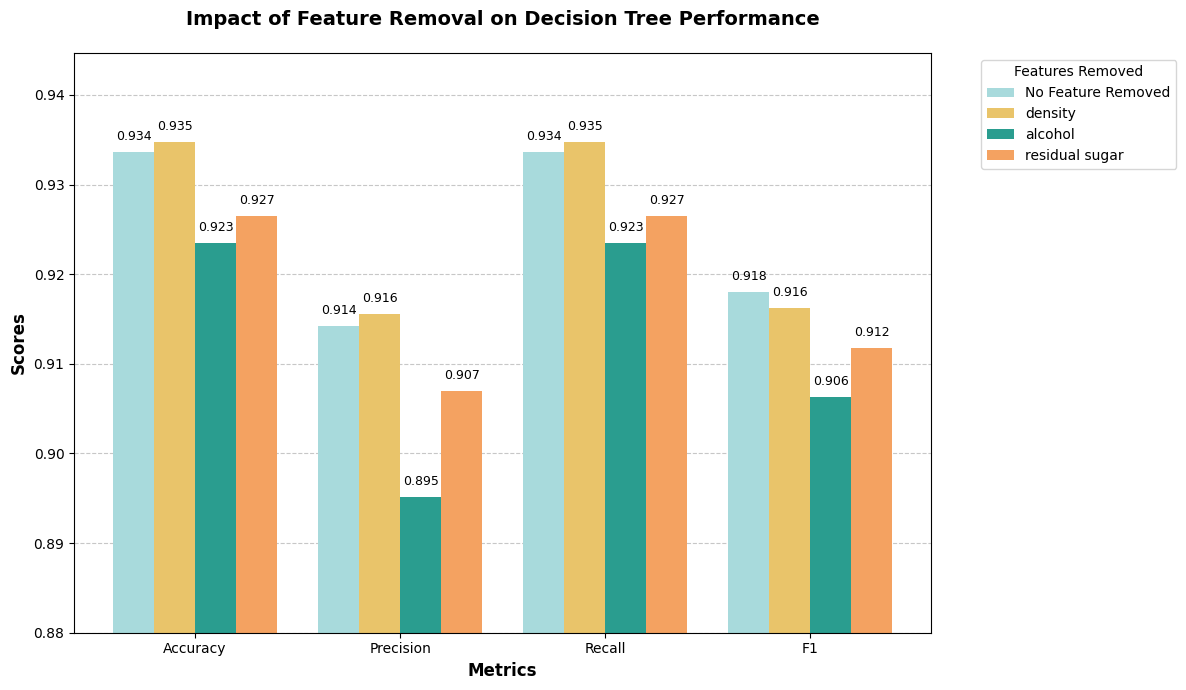

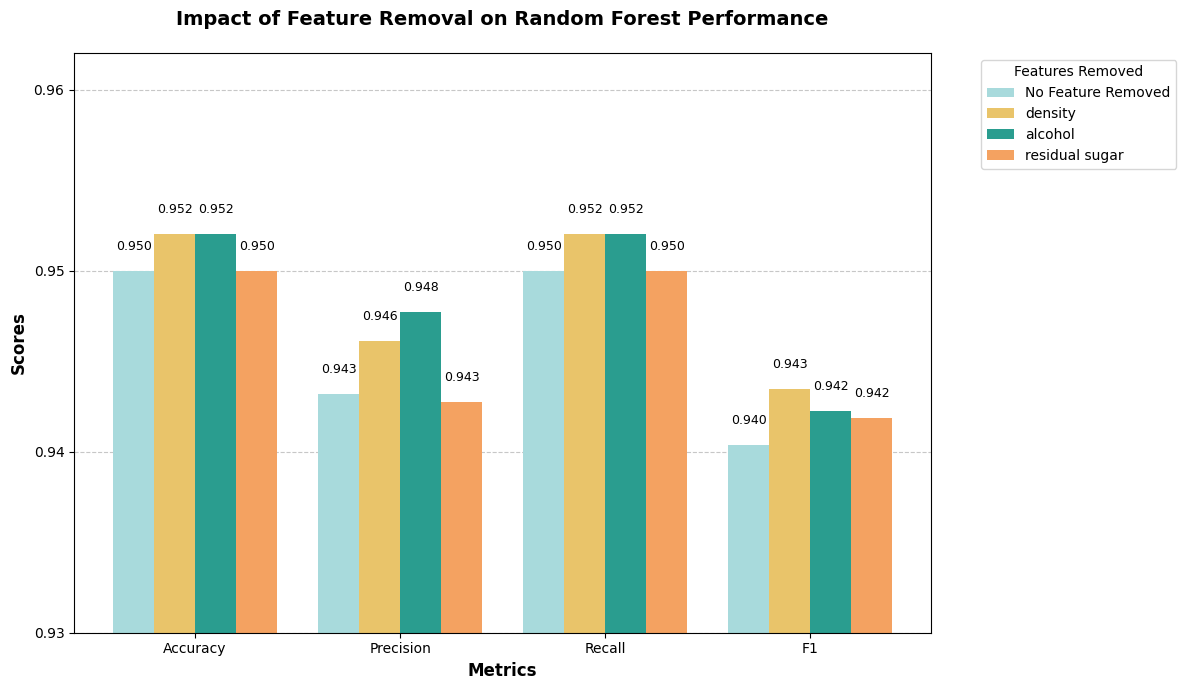

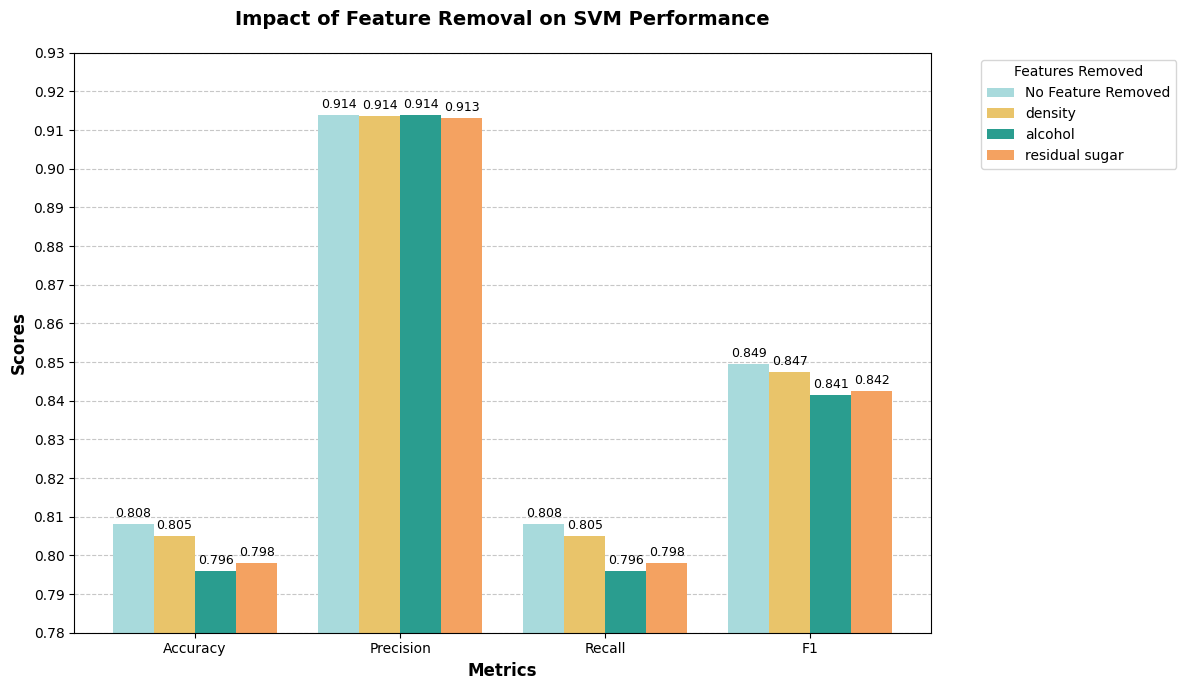

In [3]:
# Model configurations based on your optimized models
models = {
    'Decision Tree': (
        DecisionTreeClassifier, 
        {
            'max_depth': 10,
            'min_samples_split': 2,
            'min_samples_leaf': 1,
            'ccp_alpha': 0.0007038222964716062,
            'random_state': 42
        }
    ),
    'Random Forest': (
        RandomForestClassifier, 
        {
            'max_depth': 26,
            'min_samples_split': 2,
            'n_estimators': 21,
            'random_state': 42
        }
    ),
    'SVM': (
        SVC, 
        {
            'kernel': 'rbf',
            'probability': True,
            'random_state': 42,
            'C': 10,  
            'gamma': 'scale',  
            'class_weight': 'balanced' 
        }
    )
}

# Features to analyze
features_to_analyze = ['density', 'alcohol', 'residual sugar']

# Load and preprocess data without dropping any features initially
data_path = '../../../data/raw/winequalityN.csv'
X_train, X_test, y_train, y_test = load_and_preprocess_data(data_path, features_to_drop=None)

# Analyze feature impact for each model
for model_name, (model_class, params) in models.items():
    metrics_scores = analyze_feature_impact(
        model_class, X_train, X_test, y_train, y_test, 
        features_to_analyze, params
    )
    
    # Plot feature impact
    fig = plot_feature_impact(
        metrics_scores,
        f'Impact of Feature Removal on {model_name} Performance'
    )
    plt.show()